In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,id,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,move_out
0,61187,9167,해지,3,75,용지아파트,2,7,61188,9,...,2012.0,2008,40300,1897000,92,79,남,미혼,1,1
1,70016,10398,유효,10,222,용지아파트,2,7,70016,7,...,NaN,2009,64700,4320000,75,63,남,기혼,2,1
2,52239,7859,유효,3,80,용지아파트,2,7,52233,2,...,NaN,2015,36700,1954000,81,75,남,기혼,2,1
3,85470,12689,유효,10,222,지산5단지아파트,3,8,85460,6,...,NaN,2019,66600,3116000,72,70,여,미혼,1,1
4,7941,1161,해지,7,157,비둘기아파트,1,5,4750,8,...,2015.0,2015,146300,10259000,66,60,여,미혼,3,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60832 entries, 0 to 60831
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        60832 non-null  int64  
 1   순번        60832 non-null  int64  
 2   계약구분      60832 non-null  object 
 3   재계약횟수     60832 non-null  int64  
 4   거주개월      60832 non-null  int64  
 5   아파트 이름    60832 non-null  object 
 6   아파트 ID    60832 non-null  int64  
 7   아파트 평점    60832 non-null  int64  
 8   호실고유번호    60832 non-null  int64  
 9   층         60832 non-null  int64  
 10  평형대       60832 non-null  int64  
 11  계약자고유번호   60832 non-null  int64  
 12  계약서고유번호   60832 non-null  int64  
 13  입주연도      60832 non-null  int64  
 14  퇴거연도      18033 non-null  float64
 15  거주연도      60832 non-null  int64  
 16  월세(원)     60832 non-null  int64  
 17  보증금(원)    60832 non-null  int64  
 18  대표나이      60832 non-null  int64  
 19  나이        60832 non-null  int64  
 20  성별        60832 non-null  ob

In [5]:
train = train_data.copy()
test = test_data.copy()

In [6]:
train = train.drop(['퇴거연도'], axis=1)
test = test.drop(['퇴거연도'], axis=1)


In [7]:
train.describe()

,id,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,계약서고유번호,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,move_out
count,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,60832.000000,6.083200e+04,60832.000000,60832.000000,60832.000000,60832.000000
mean,43458.193796,6492.306599,7.380425,174.313914,1.830632,6.393773,43441.431582,7.884896,13.289256,43459.943780,43431.600490,2005.245874,2013.989052,57683.088177,3.385542e+06,66.665900,59.654951,1.655428,0.951506
std,25052.430292,3739.936353,2.761137,64.803830,0.873536,1.282835,25054.717387,4.270328,2.387789,25040.025044,25031.204218,4.840107,3.730135,30533.036487,2.378867e+06,12.941232,13.270605,0.929361,0.214810
min,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1994.000000,2008.000000,31300.000000,1.520000e+06,21.000000,20.000000,1.000000,0.000000
25%,21776.500000,3248.000000,5.000000,126.000000,1.000000,5.000000,21776.000000,4.000000,12.000000,21841.750000,21804.000000,2002.000000,2011.000000,40300.000000,1.954000e+06,59.000000,51.000000,1.000000,1.000000
50%,43524.000000,6556.500000,8.000000,196.000000,2.000000,7.000000,43454.000000,8.000000,12.000000,43393.000000,43391.000000,2003.000000,2014.000000,43600.000000,2.144000e+06,66.000000,59.000000,1.000000,1.000000
75%,65099.250000,9699.000000,10.000000,222.000000,2.000000,7.000000,65090.000000,12.000000,15.000000,65099.000000,65066.000000,2008.000000,2017.000000,63600.000000,3.824000e+06,76.000000,69.000000,2.000000,1.000000
max,86903.000000,12883.000000,12.000000,323.000000,5.000000,10.000000,86891.000000,15.000000,19.000000,86892.000000,86904.000000,2020.000000,2020.000000,311080.000000,1.853640e+07,121.000000,120.000000,10.000000,1.000000


In [8]:
len(train.columns)

23

In [9]:
train.corr()['move_out']

id          0.013899
순번          0.013892
재계약횟수       0.223704
거주개월        0.217926
아파트 ID      0.019568
아파트 평점      0.019963
호실고유번호      0.013855
층           0.005402
평형대         0.023630
계약자고유번호    -0.015987
계약서고유번호    -0.019820
입주연도        0.004543
거주연도       -0.015578
월세(원)      -0.021827
보증금(원)     -0.021084
대표나이        0.020510
나이          0.015623
거주자 수      -0.061058
move_out    1.000000
Name: move_out, dtype: float64

In [10]:
train.isnull().sum()

id          0
순번          0
계약구분        0
재계약횟수       0
거주개월        0
아파트 이름      0
아파트 ID      0
아파트 평점      0
호실고유번호      0
층           0
평형대         0
계약자고유번호     0
계약서고유번호     0
입주연도        0
거주연도        0
월세(원)       0
보증금(원)      0
대표나이        0
나이          0
성별          0
결혼여부        0
거주자 수       0
move_out    0
dtype: int64

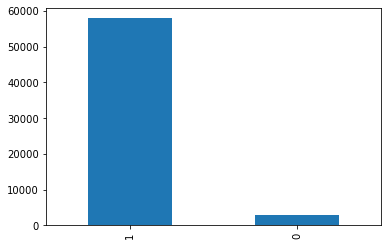

In [11]:
train['move_out'].value_counts().plot.bar()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit


In [13]:
!pip install - U - -pre pycaret
!pip install xgboost == 1.1.0



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -p
ERROR: Invalid requirement: '=='

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from pycaret.classification import *


In [15]:
clf = setup(data=train, target='move_out',
            train_size=0.8, fold=10, fix_imbalance=True)

,Description,Value
0,session_id,3736
1,Target,move_out
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(60832, 23)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best_5 = compare_models(sort='AUC', n_select=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9845,0.9955,0.9930,0.9908,0.9919,0.8285,0.8289,3.7540
lightgbm,Light Gradient Boosting Machine,0.9823,0.9947,0.9928,0.9887,0.9907,0.7997,0.8008,0.2990
lda,Linear Discriminant Analysis,0.8316,0.9808,0.8230,1.0000,0.9029,0.3104,0.4285,0.4640
ada,Ada Boost Classifier,0.9550,0.9734,0.9687,0.9838,0.9762,0.5729,0.5787,0.8780
gbc,Gradient Boosting Classifier,0.9502,0.9648,0.9691,0.9783,0.9737,0.5021,0.5046,3.7460
et,Extra Trees Classifier,0.9533,0.9627,0.9872,0.9645,0.9757,0.3490,0.3672,1.2650
rf,Random Forest Classifier,0.9519,0.9608,0.9914,0.9594,0.9752,0.2407,0.2783,1.2080
qda,Quadratic Discriminant Analysis,0.7514,0.8688,0.7388,0.9999,0.8497,0.2146,0.3464,0.3390
dt,Decision Tree Classifier,0.9661,0.8233,0.9814,0.9830,0.9822,0.6370,0.6372,0.1530
nb,Naive Bayes,0.6643,0.7380,0.6628,0.9771,0.7898,0.0891,0.1599,0.0660


In [18]:
# best_5 model : et, rf, catboost, xgboost, lightgbm

model = create_model('xgboost')  # Mean AUC : 0.8686


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9852,0.9962,0.9916,0.9929,0.9922,0.8416,0.8417
1,0.9854,0.9957,0.9929,0.9918,0.9923,0.8403,0.8404
2,0.9860,0.9967,0.9944,0.9910,0.9927,0.8436,0.8441
3,0.9838,0.9957,0.9937,0.9893,0.9915,0.8163,0.8173
4,0.9840,0.9948,0.9920,0.9912,0.9916,0.8242,0.8242
5,0.9883,0.9965,0.9961,0.9916,0.9939,0.8669,0.8680
6,0.9858,0.9956,0.9944,0.9907,0.9926,0.8403,0.8409
7,0.9829,0.9950,0.9920,0.9901,0.9910,0.8110,0.8112
8,0.9842,0.9952,0.9922,0.9912,0.9917,0.8261,0.8262


In [20]:
pred = predict_model(model, data=test)


In [21]:
pred

,id,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,...,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,Label,Score
0,77315,11572,해지,5,106,지산5단지아파트,3,8,77315,6,...,2009,62500,4290000,94,82,여,미혼,1,1,0.9946
1,9515,1387,유효,8,186,비둘기아파트,1,5,6460,1,...,2008,33700,1907000,62,49,여,미혼,2,1,1.0000
2,1668,231,유효,10,222,까치아파트,4,10,7227,4,...,2016,53600,2600000,72,67,여,미혼,1,1,1.0000
3,57273,8567,유효,7,156,용지아파트,2,7,57271,13,...,2010,40300,1897000,52,41,여,미혼,2,1,1.0000
4,19049,2817,유효,3,79,비둘기아파트,1,5,19042,3,...,2015,39200,1964000,89,83,남,미혼,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26067,81241,12110,유효,7,162,지산5단지아파트,3,8,81236,11,...,2014,38400,1777000,82,75,여,미혼,1,1,1.0000
26068,83076,12351,유효,8,192,지산5단지아파트,3,8,83071,6,...,2014,86300,5912000,69,62,남,기혼,2,1,1.0000
26069,25820,3846,유효,10,234,비둘기아파트,1,5,25810,14,...,2019,41200,2062000,89,87,여,미혼,1,1,0.9999
26070,36133,5417,유효,10,244,비둘기아파트,1,5,41721,14,...,2017,62400,3112000,66,62,남,기혼,3,1,1.0000


In [22]:
submission = pd.read_csv('sample_submission.csv')

In [23]:
sub_pred = pred[['Label', 'Score']]
print(sub_pred)


       Label   Score
0          1  0.9946
1          1  1.0000
2          1  1.0000
3          1  1.0000
4          1  1.0000
...      ...     ...
26067      1  1.0000
26068      1  1.0000
26069      1  0.9999
26070      1  1.0000
26071      1  0.9998

[26072 rows x 2 columns]


In [24]:
for i in range(len(sub_pred)):
    if sub_pred['Label'][i] == 0:
        sub_pred['Score'][i] = 1 - sub_pred['Score'][i]


submission['move_out'] = sub_pred['Score']
submission


,id,move_out
0,77315,0.9946
1,9515,1.0000
2,1668,1.0000
3,57273,1.0000
4,19049,1.0000
...,...,...
26067,81241,1.0000
26068,83076,1.0000
26069,25820,0.9999
26070,36133,1.0000


In [25]:
submission.to_csv("xgboost.csv", index=False)
print(submission)


          id  move_out
0      77315    0.9946
1       9515    1.0000
2       1668    1.0000
3      57273    1.0000
4      19049    1.0000
...      ...       ...
26067  81241    1.0000
26068  83076    1.0000
26069  25820    0.9999
26070  36133    1.0000
26071    680    0.9998

[26072 rows x 2 columns]
